<a href="https://colab.research.google.com/github/pepetellez/BEDU-Data-Analysis/blob/main/Analisis-de-Datos-con-Python/8_Introduccion_a_Machine_Learning_Clasificacion_No_Supervisada_y_Supervisada/s8_r3_matriz_de_confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 3: Matriz de Confusión

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una matriz de confusión
    
---
    
### 2. Desarrollo:

En este Reto vamos a utilizar una matriz de confusión para evaluar el modelo que entrenamos en el Reto anterior. Tu Reto consiste en los siguientes pasos:

1. Copia el código del Reto anterior a este Reto, de manera que tengas un modelo entrenado que sea similar.
2. Obtén tu matriz de confusión utilizando `sklearn.metrics.confusion_matrix`.
3. Usando un mapa de calor (heatmap), grafica tu matriz de confusión de manera que sea muy claro y evidente lo que está pasando. Recuerda modificar tus estilos para que sean agradables a la vista.
4. Utilizando la matriz de confusión, obtén las medidas de Precisión, Exactitud, Sensibilidad y Especificidad. Evalúa tu modelo utilizando estas medidas.

> **Reto extra**: Para un reto extra, obtén las medidas del punto 4 sin utilizar los métodos `sklearn.metrics`. Recuerda que todas tus medidas de evaluación las puedes obtener usando aritmética simple y tu matriz de confusión.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes-clean.csv", index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


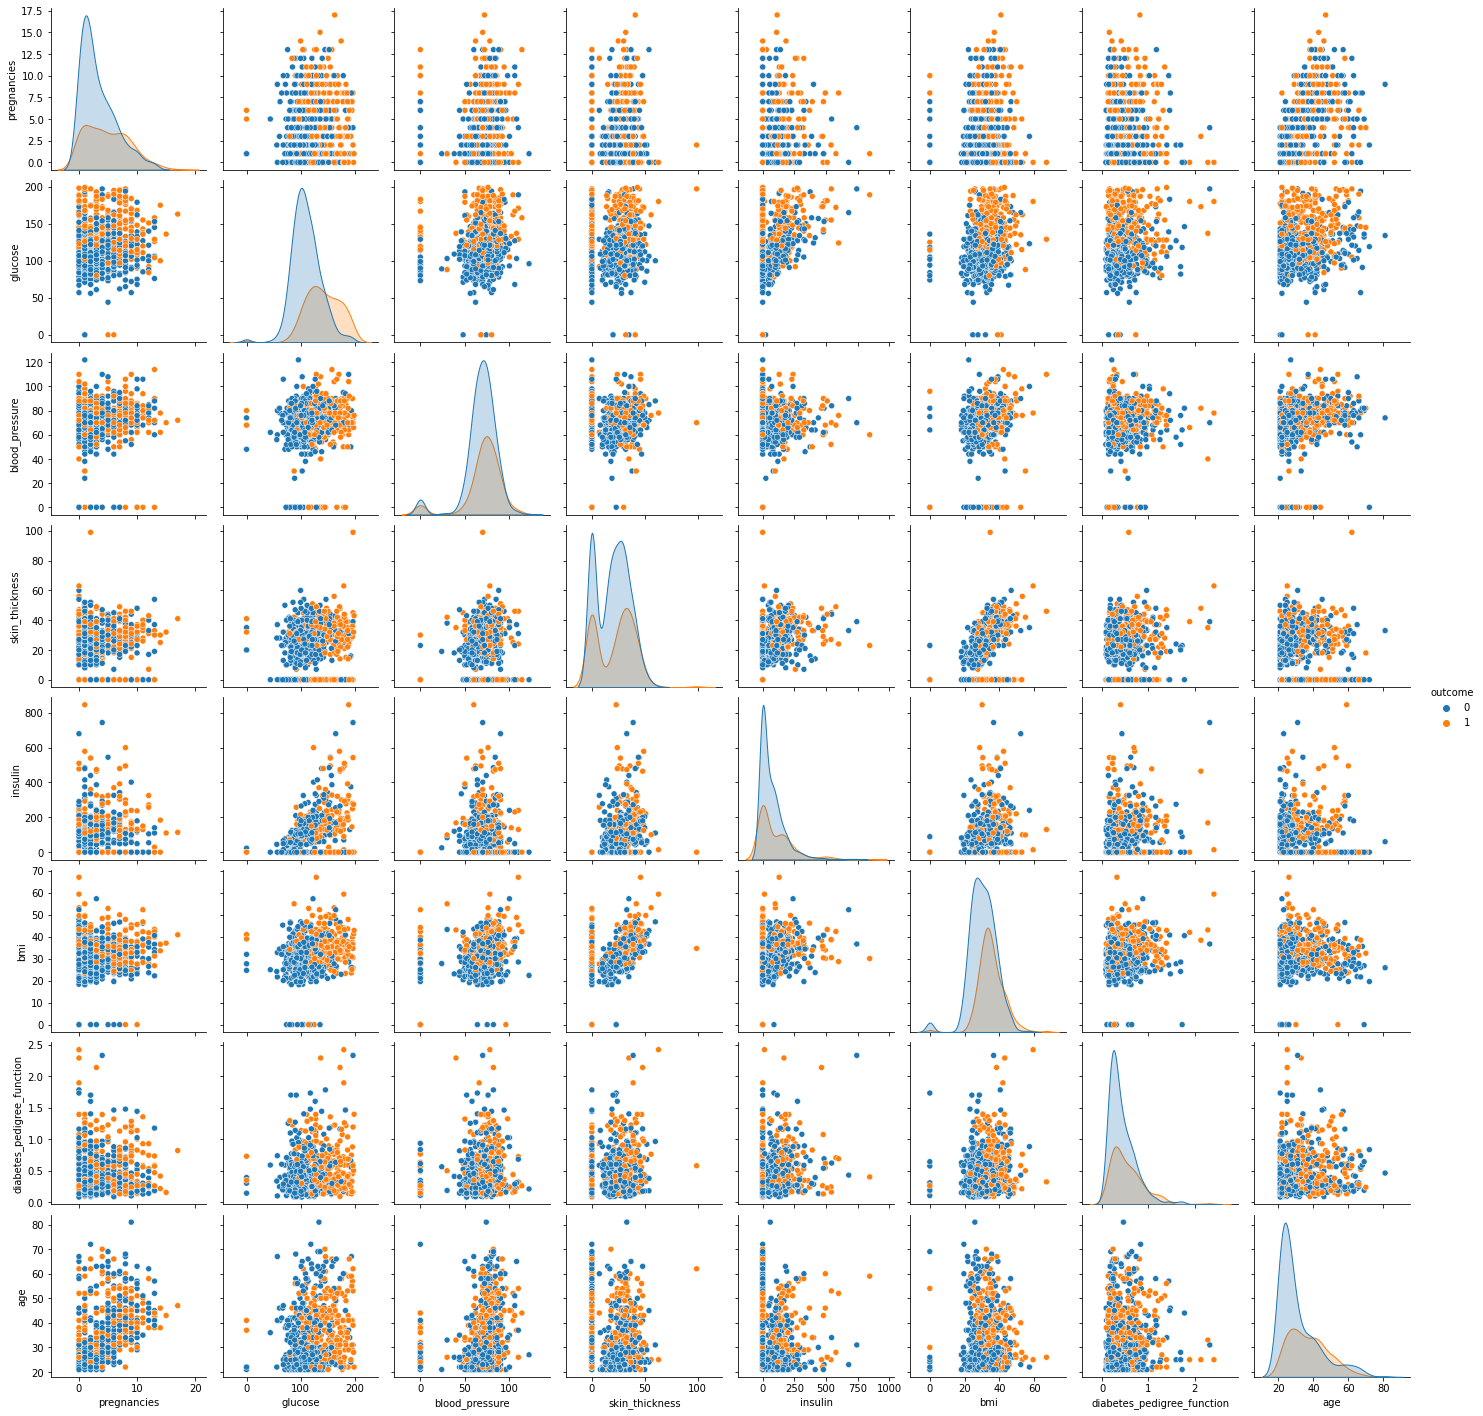

In [6]:
sns.pairplot(df, hue="outcome")

In [7]:
X = df.drop(columns=['outcome'])
y = df['outcome']

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
print("Exactitud promedio: ", logreg.score(X_test, y_test))

Exactitud promedio:  0.7965367965367965


In [24]:
from sklearn import metrics

In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[126,  12],
       [ 35,  58]])

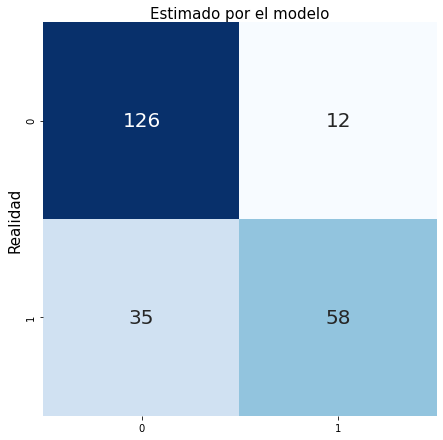

In [28]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [30]:
tn, fp, fn, tp = cnf_matrix.ravel()

#Precisión: ¿cuántas de ésas eran en realidad positivas?
#Exactitud: ¿cuántas fueron clasificadas correctamente?
#Sensibilidad: ¿cuántas fueron clasificadas correctamente como positivas?
#Especificidad: ¿cuántas fueron clasificadas correctamente como negativas?

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.8285714285714286
Exactitud: 0.7965367965367965
Sensibilidad: 0.6236559139784946
Especificidad: 0.9130434782608695
